# 上海链家租房信息分析
## 首先导入csv文件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys

plt.rcParams['font.sans-serif'] = ['SimHei']    
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('zufang.csv')
df.head()

,area,direction,district,house,price,traffic,type
0,21㎡,朝南,宝山,景瑞遇道 1室0厅 南,3000,607,1室0厅1卫
1,54㎡,朝南,徐汇,寿昌坊 2室1厅 南,5000,941,2室1厅1卫
2,58㎡,朝南,徐汇,梅陇四村 1室1厅 南,4000,0,1室1厅1卫
3,44㎡,朝南,静安,整租·南长苑 1室1厅 南,5300,599,1室1厅1卫
4,34㎡,朝南,徐汇,整租·乐山六七村 1室1厅 南,3800,733,1室1厅1卫


## 从字符串中提取数字

In [3]:
# 去除㎡，将字符串转为数字
def data_adj(area_data, str):       
    if str in area_data :        
        return float(area_data[0 : area_data.find(str)])    
    else :        
        return None
# 处理房屋面积数据
df ['area'] = df['area'].apply(data_adj,str = '㎡')
df.head()

,area,direction,district,house,price,traffic,type
0,21.0,朝南,宝山,景瑞遇道 1室0厅 南,3000,607,1室0厅1卫
1,54.0,朝南,徐汇,寿昌坊 2室1厅 南,5000,941,2室1厅1卫
2,58.0,朝南,徐汇,梅陇四村 1室1厅 南,4000,0,1室1厅1卫
3,44.0,朝南,静安,整租·南长苑 1室1厅 南,5300,599,1室1厅1卫
4,34.0,朝南,徐汇,整租·乐山六七村 1室1厅 南,3800,733,1室1厅1卫


## 查看别墅信息，并删除

In [6]:
# 查看别墅信息
bieshu = df[df.house.str.contains('别墅')]
print('共有别墅%d栋'%bieshu.shape[0])
# 价格最高的5个别墅
bieshu.sort_values('price', ascending=False).head(5)

共有别墅518栋


,area,direction,district,house,price,traffic,type
14208,1236.0,朝南,长宁,整租·新华别墅 4室2厅 南/北,270000,606,4室2厅3卫
12227,593.0,朝南,闸北,整租·华侨城苏河湾(别墅) 4室2厅 南/北,250000,365,4室2厅4卫
13807,568.0,朝南,长宁,整租·大境别墅 11室3厅 南,180000,0,11室3厅4卫
140,1091.0,朝南,浦东,整租·合生东郊别墅(一期) 6室3厅 南/北,150000,0,6室3厅5卫
7377,911.0,朝南,闵行,虹桥高尔夫别墅 5室3厅 南,120000,0,5室3厅5卫


In [7]:
# 删除别墅信息
df.drop(bieshu.index, inplace=True)
print('现在还剩下%d条记录'%df.shape[0])

现在还剩下18163条记录


## 获取总价前五的房源信息

In [9]:
# ascending=False 降序排列
# 查看房价最高的前5名
df.sort_values('price', ascending=False).head() 

,area,direction,district,house,price,traffic,type
14209,548.0,朝南,长宁,武夷路188号 6室2厅 南,420000,1063,6室2厅5卫
9671,5600.0,朝南,浦东,汇洋北宿舍 20室9厅 南,369600,0,20室9厅9卫
16182,474.0,朝南,徐汇,常熟路182号 6室3厅 南,350000,0,6室3厅4卫
10387,551.0,朝南,浦东,整租·九间堂 6室3厅 南,280000,962,6室3厅5卫
13900,638.0,朝南,长宁,整租·定西路1235弄 10室3厅 南,250000,531,10室3厅5卫


## 查看户型分布情况

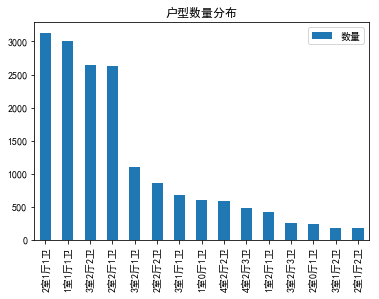

In [11]:
# 户型数量分布
type = df['type'].value_counts()  
type.head(15).plot(kind='bar', x='type', y='size', title='户型数量分布')  
plt.legend(['数量'])
plt.show()

## 聚类分析

In [13]:
# 聚类分析
cluster_data = df[['price', 'area','traffic']].dropna()
K_model = KMeans(n_clusters=3)
alg = K_model.fit(cluster_data)
'------聚类中心------' 
center = pd.DataFrame(alg.cluster_centers_, columns=['房价','面积','交通'])
cluster_data['label'] = alg.labels_
center

,房价,面积,交通
0,7070.660610,89.296636,343.315435
1,103344.074713,359.477011,604.603448
2,29153.504798,210.651631,401.947697


## 面积最小的前五个房子

In [15]:
# 面积最小的房子前5名
minhouse = df.sort_values('area', ascending=True)
minhouse.head()

,area,direction,district,house,price,traffic,type
6171,1.0,朝南,闵行,万乐城(商业类) 1室0厅 南,1800,0,1室0厅1卫
15632,7.0,朝南,徐汇,整租·泰安路20号 1室0厅 南,6000,622,1室0厅0卫
2771,7.0,朝南,松江,莘松路1288弄515号 1室1厅 南,2800,0,1室1厅1卫
15776,10.0,朝南,徐汇,永康路63号 1室1厅 南,3200,576,1室1厅1卫
9473,11.0,朝南,杨浦,武川路99弄 2室1厅 南/北,6600,1014,2室1厅1卫


## 面积最大的房子

In [ ]:
# 面积最大的房子
df.sort_values('area', ascending=False).iloc[0,:]

In [18]:
# 各个地区房源均价

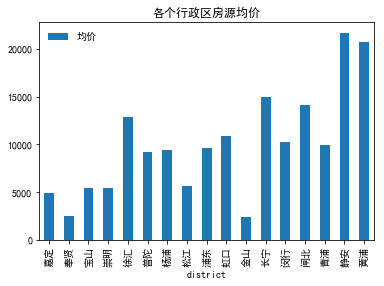

In [19]:
#按district 分类，统计price的平均数
house_price_perdistrict = df.groupby('district')['price'].mean()
house_price_perdistrict.plot(kind='bar', x='district', y='price', title='各个行政区房源均价')
plt.legend(['均价'], frameon=False)
plt.show()

## 各个地区房源数量

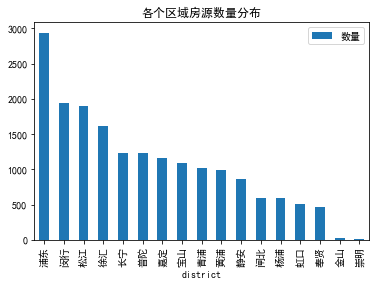

In [21]:
# 按district分类，统计house数量
house_num = df.groupby('district')['house'].count().sort_values(ascending=False)
house_num.head(20).plot(kind='bar', x='district', y='size', title='各个区域房源数量分布')
plt.legend(['数量'])
plt.show()